In [5]:

import pandas as pd 
import os 
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu, normaltest
# from utils import *


In [6]:
current_directory = os.getcwd()
print(current_directory)
# date = datetime.now().strftime("%Y%m%d")
# pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')

# Get current directory
current_directory = os.getcwd()
data_path = current_directory + '/Data/'

# Set path 
df = pd.read_csv(f"{data_path}/clustered/full_cd_clus_20_40_49.csv").rename(columns={'cluster': 'agglomerateto_275'})
df_loc = pd.read_csv(f"{data_path}/celldata/celldata_20240313.csv")[['cellID', 'Location_Center_X', 'Location_Center_Y']].rename(columns={'cellID': 'source_ID', 'cluster': 'agglomerateto_275'})

# Merge location data 
df_full= pd.merge(df, df_loc, on='source_ID', how='inner')


c:\Users\jhroe\Desktop\Thesis\Clean\CellularCommunityAnalysisNSCLC\Sorin


In [7]:
treg_clusters_40 = [28, 26, 27, 37, 5, 24, 34, 22, 39, 12]
data = df_full[['Patient_ID', 'agglomerateto_40', 'surv_5y']]
data

,Patient_ID,agglomerateto_40,surv_5y
0,LUAD_D001,27,1
1,LUAD_D001,27,1
2,LUAD_D001,27,1
3,LUAD_D001,27,1
4,LUAD_D001,27,1
...,...,...,...
1637717,LUAD_D213,19,1
1637718,LUAD_D213,19,1
1637719,LUAD_D213,19,1
1637720,LUAD_D213,19,1


In [10]:
count_data = data.groupby(['Patient_ID', 'agglomerateto_40', 'surv_5y']).size().reset_index(name='count')
total_clus = count_data.groupby(['Patient_ID', 'surv_5y'])['count'].sum().reset_index(name='total_clus')

count_data

,Patient_ID,agglomerateto_40,surv_5y,count
0,LUAD_D001,1,1,12
1,LUAD_D001,2,1,3
2,LUAD_D001,3,1,81
3,LUAD_D001,4,1,198
4,LUAD_D001,5,1,1378
...,...,...,...,...
13251,LUAD_D416,36,1,7
13252,LUAD_D416,37,1,13
13253,LUAD_D416,38,1,10
13254,LUAD_D416,39,1,177


In [11]:
count_df = pd.merge(count_data, total_clus, on=['Patient_ID','surv_5y'])
# totalscid = count_df['total_scid']
# print(count_df.head())
count_df['relative_frequency'] = (count_df['count'] / count_df['total_clus'])
count_df

,Patient_ID,agglomerateto_40,surv_5y,count,total_clus,relative_frequency
0,LUAD_D001,1,1,12,4517,0.002657
1,LUAD_D001,2,1,3,4517,0.000664
2,LUAD_D001,3,1,81,4517,0.017932
3,LUAD_D001,4,1,198,4517,0.043834
4,LUAD_D001,5,1,1378,4517,0.305070
...,...,...,...,...,...,...
13251,LUAD_D416,36,1,7,2879,0.002431
13252,LUAD_D416,37,1,13,2879,0.004515
13253,LUAD_D416,38,1,10,2879,0.003473
13254,LUAD_D416,39,1,177,2879,0.061480


In [12]:
count_df['agglomerateto_40'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 33, 34, 35, 36, 37, 38, 39,
       40, 18, 28, 10, 29, 32], dtype=int64)

In [13]:
boxplot_df = count_df.loc[count_df['agglomerateto_40'].isin(treg_clusters_40)][['Patient_ID', 'agglomerateto_40', 'surv_5y', 'relative_frequency']]
# boxplot_df
boxplot_df['agglomerateto_40'].unique()

array([ 5, 12, 22, 24, 26, 27, 34, 37, 39, 28], dtype=int64)

In [57]:
boxplot_all = count_df[['Patient_ID', 'agglomerateto_40', 'surv_5y', 'relative_frequency']]
boxplot_all


,Patient_ID,agglomerateto_40,surv_5y,relative_frequency
0,LUAD_D001,1,1,0.002657
1,LUAD_D001,2,1,0.000664
2,LUAD_D001,3,1,0.017932
3,LUAD_D001,4,1,0.043834
4,LUAD_D001,5,1,0.305070
...,...,...,...,...
13251,LUAD_D416,36,1,0.002431
13252,LUAD_D416,37,1,0.004515
13253,LUAD_D416,38,1,0.003473
13254,LUAD_D416,39,1,0.061480


In [39]:
df5 = boxplot_df.loc[boxplot_df['agglomerateto_40'] == 5]
low = df5.loc[df5['surv_5y'] == 0]
high = df5.loc[df5['surv_5y'] == 1]
high


,Patient_ID,agglomerateto_40,surv_5y,relative_frequency
4,LUAD_D001,5,1,0.305070
39,LUAD_D002,5,1,0.323614
138,LUAD_D005,5,1,0.061395
176,LUAD_D006,5,1,0.066818
214,LUAD_D007,5,1,0.078153
...,...,...,...,...
13054,LUAD_D411,5,1,0.110998
13088,LUAD_D412,5,1,0.177797
13121,LUAD_D413,5,1,0.338839
13153,LUAD_D414,5,1,0.281244


In [58]:
pvals_toptreg = []
for clus in sorted(treg_clusters_40):
    df5 = boxplot_df.loc[boxplot_df['agglomerateto_40'] == clus]
    low = df5.loc[df5['surv_5y'] == 0]
    high = df5.loc[df5['surv_5y'] == 1]
    pval = mannwhitneyu(high['relative_frequency'], low['relative_frequency'], alternative="two-sided").pvalue
    pvals_toptreg.append(pval)

pvals_toptreg

[0.005627571933166144,
 0.10034245389677324,
 0.5438154508932126,
 0.409458389755061,
 0.04612308823323189,
 0.14931285331388056,
 0.659566278142925,
 0.0194210653007504,
 0.7533348224224216,
 0.3802461796982949]

c:\Users\jhroe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


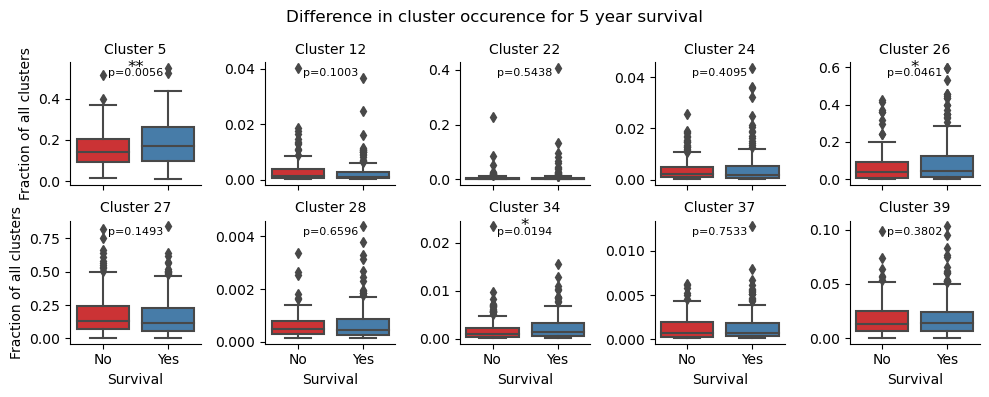

In [78]:
# Plot using Seaborn
# sns.set(style="whitegrid")
g = sns.FacetGrid(boxplot_df, col="agglomerateto_40", col_wrap=5, height=2, sharey=False)
g.map_dataframe(sns.boxplot, x="surv_5y", y="relative_frequency", palette="Set1")
g.set_axis_labels("Survival", "Fraction of all clusters")
g.set_titles("Cluster {col_name}")

# Add p-value annotation to each subplot
i = 0
for ax, (_, data) in zip(g.axes.flat, df.groupby('agglomerateto_40')):
    p_value = pvals_toptreg[i]
    i+=1
    if p_value < 0.001:
        ax.text(0.5, 1.02, '***', ha='center', va='top', transform=ax.transAxes, fontsize= 12)
    elif p_value < 0.01:
        ax.text(0.5, 1.02, '**', ha='center', va='top', transform=ax.transAxes, fontsize= 12)
    elif p_value < 0.05:
        ax.text(0.5, 1.02, '*', ha='center', va='top', transform=ax.transAxes, fontsize= 12)

    ax.text(0.5, 0.95, f'p={p_value:.4f}', ha='center', va='top', transform=ax.transAxes, fontsize= 8)

g.set_xticklabels(["No", "Yes"])

g.fig.suptitle('Difference in cluster occurence for 5 year survival')
plt.subplots_adjust(top=0.85)  # Adjust the top to make room for the title

plt.savefig(f'{data_path}plots/boxplot_toptregclus_clus40__pvals.png', bbox_inches='tight', dpi=300)

plt.show()


In [59]:
pvals_all = []
for clus in range(1,41):
    df5 = boxplot_all.loc[boxplot_all['agglomerateto_40'] == clus]
    low = df5.loc[df5['surv_5y'] == 0]
    high = df5.loc[df5['surv_5y'] == 1]
    pval = mannwhitneyu(high['relative_frequency'], low['relative_frequency'], alternative="two-sided").pvalue
    pvals_all.append(pval)

pvals_all

[0.6525972085284517,
 0.48141125908382665,
 0.17202473049420086,
 0.6164694627482954,
 0.005627571933166144,
 0.7437045040398584,
 0.4188314391236364,
 0.026703604053445254,
 0.9527693731991128,
 0.8719255911467134,
 0.1642707330956883,
 0.10034245389677324,
 0.5667016022542559,
 0.8767610877597112,
 0.1676415763115321,
 0.6188561303705006,
 0.9768760795133372,
 0.09754283651370656,
 0.6952601723281717,
 0.02175115198766208,
 0.45557527859007707,
 0.5438154508932126,
 0.35008293994795614,
 0.409458389755061,
 0.23743025362915138,
 0.04612308823323189,
 0.14931285331388056,
 0.659566278142925,
 0.3824435173497025,
 0.9082436530012106,
 0.022558190999255285,
 0.4078067031705427,
 0.052625600876720205,
 0.0194210653007504,
 0.3308623014159665,
 0.1587991342396008,
 0.7533348224224216,
 0.8629976422741301,
 0.3802461796982949,
 0.4866045444807817]

c:\Users\jhroe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


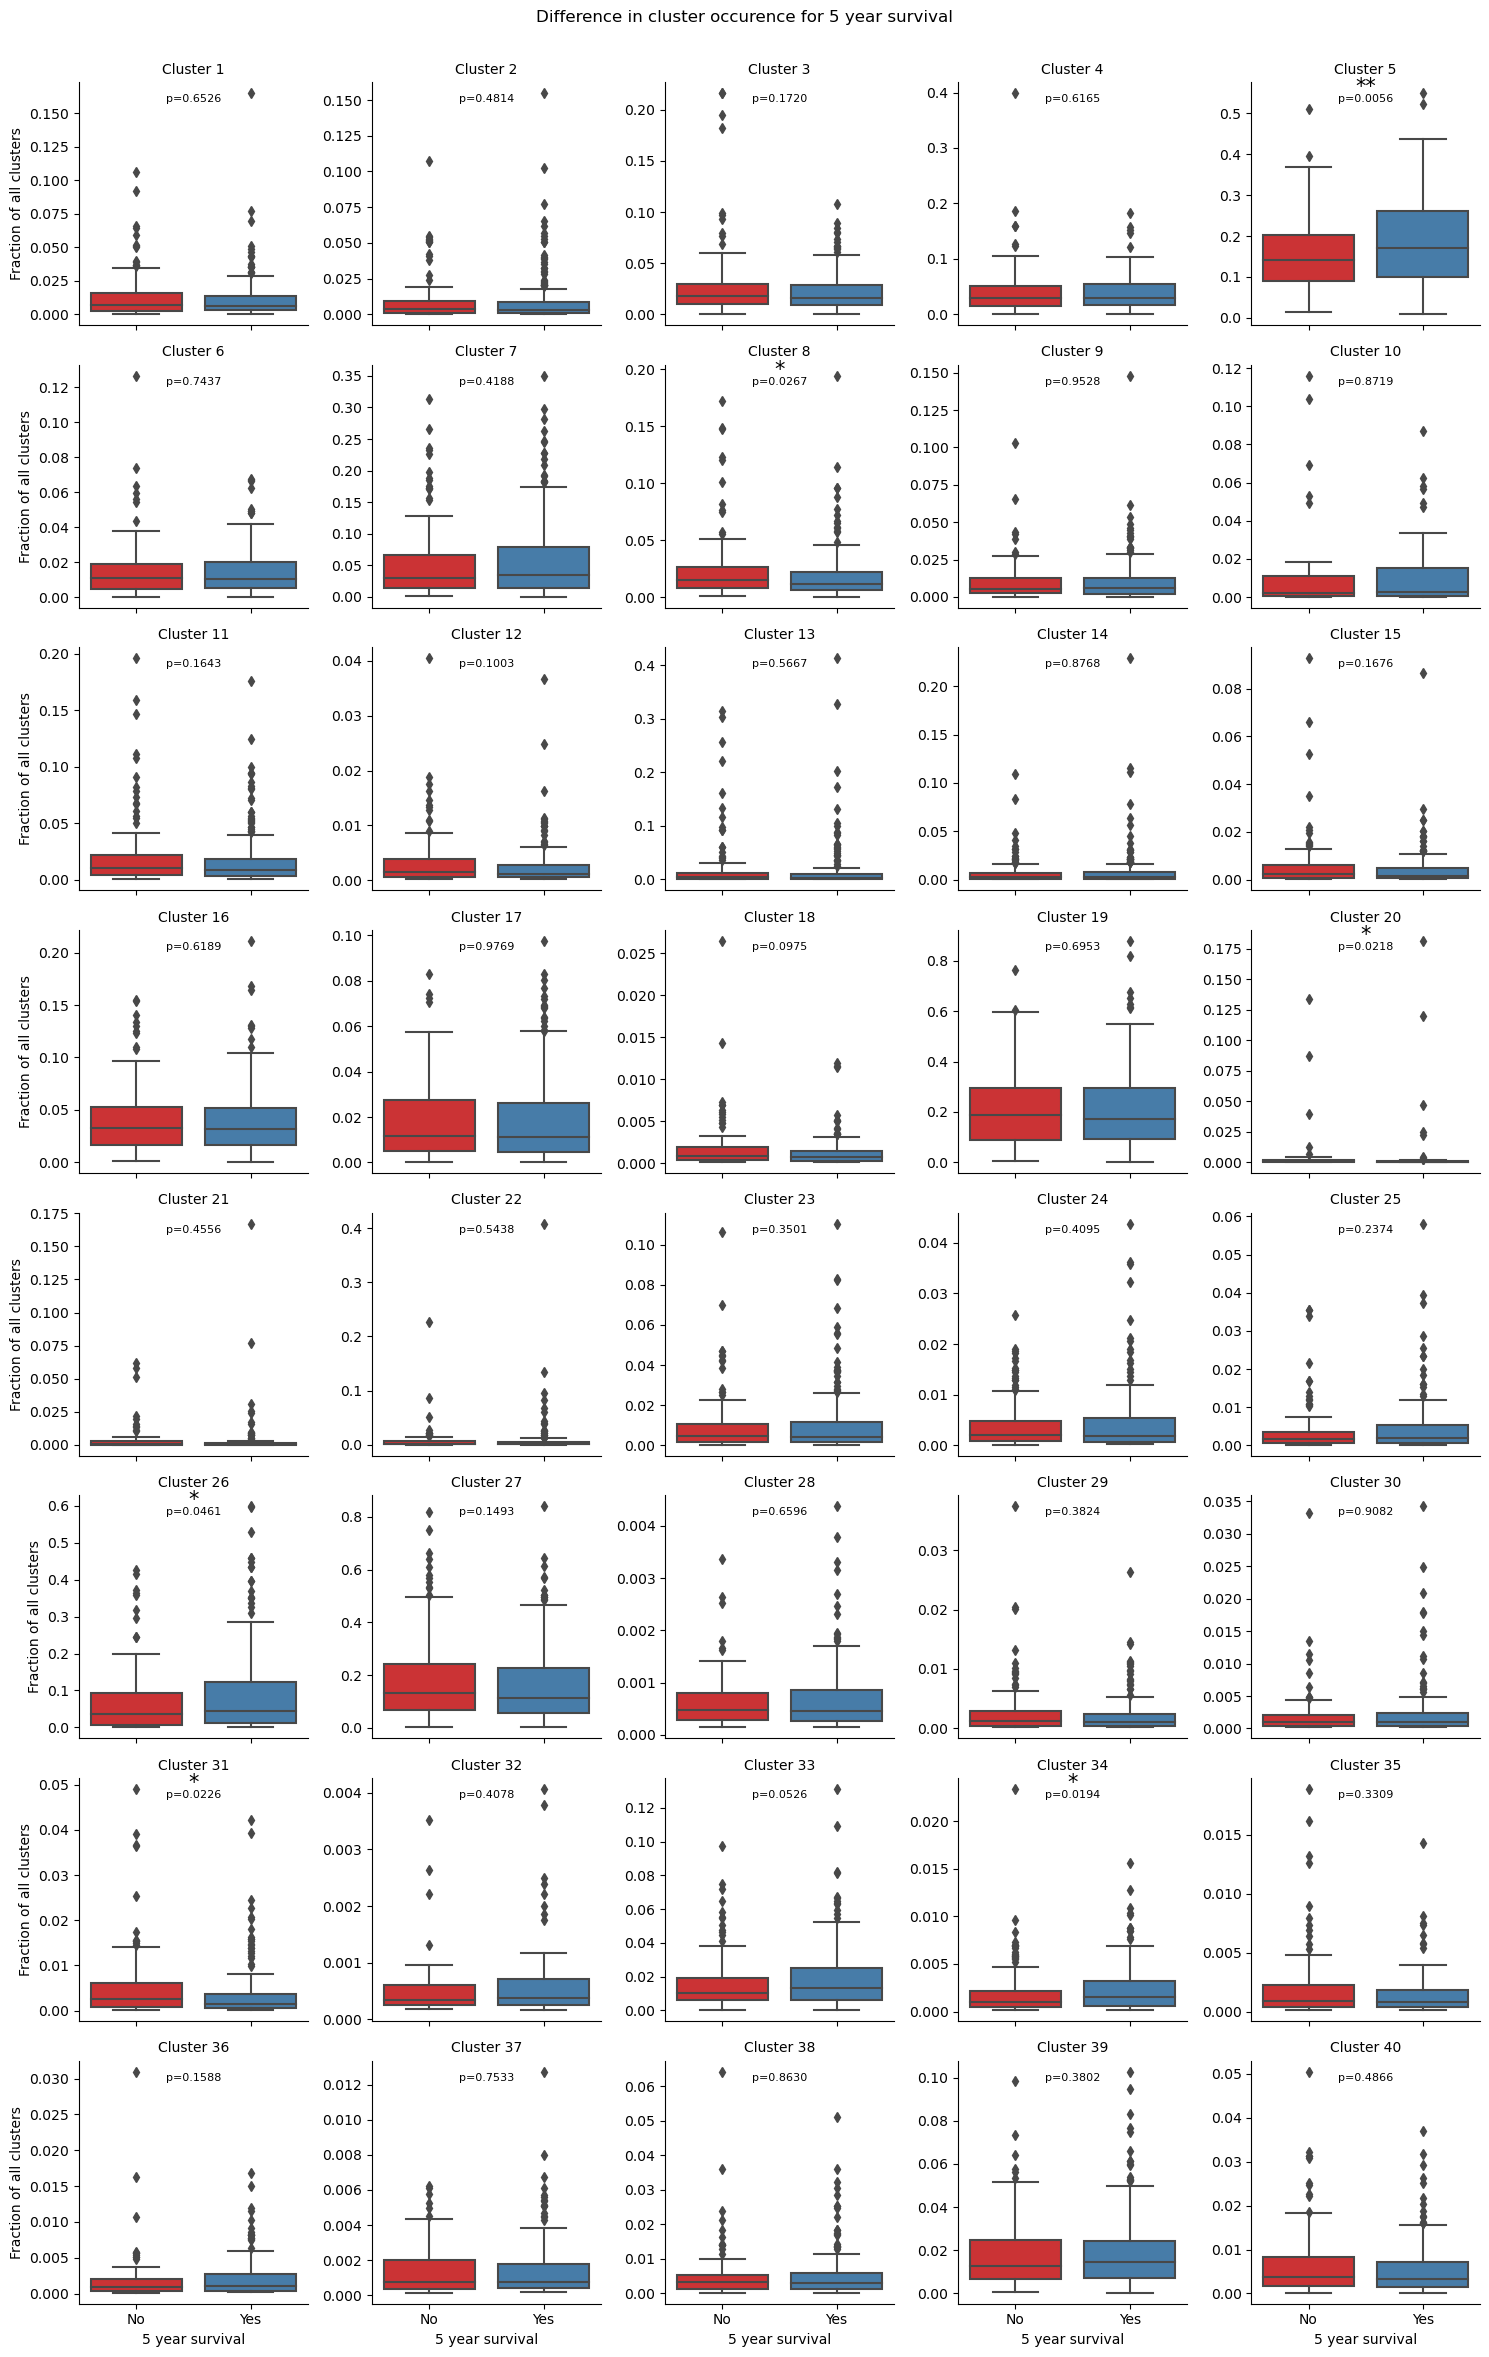

In [75]:
# Plot using Seaborn
# sns.set(style="whitegrid")
g = sns.FacetGrid(boxplot_all, col="agglomerateto_40", col_wrap=5, height=3, sharey=False)
g.map_dataframe(sns.boxplot, x="surv_5y", y="relative_frequency", palette="Set1")
g.set_axis_labels("5 year survival", "Fraction of all clusters")
g.set_titles("Cluster {col_name}")

# Add p-value annotation to each subplot
i = 0
for ax, (_, data) in zip(g.axes.flat, df.groupby('agglomerateto_40')):
    p_value = pvals_all[i]
    i+=1
    if p_value < 0.001:
        ax.text(0.5, 1.02, '***', ha='center', va='top', transform=ax.transAxes, fontsize= 15)
    elif p_value < 0.01:
        ax.text(0.5, 1.02, '**', ha='center', va='top', transform=ax.transAxes, fontsize= 15)
    elif p_value < 0.05:
        ax.text(0.5, 1.02, '*', ha='center', va='top', transform=ax.transAxes, fontsize= 15)

    ax.text(0.5, 0.95, f'p={p_value:.4f}', ha='center', va='top', transform=ax.transAxes, fontsize= 8)

g.set_xticklabels(["No", "Yes"])

g.fig.suptitle('Difference in cluster occurence for 5 year survival')
plt.subplots_adjust(top=0.95)  # Adjust the top to make room for the title

# plt.title('Difference in cluster occurence for long')
plt.savefig(f'{data_path}plots/boxplot_allclus_clus40__pvals.png', bbox_inches='tight', dpi=300)

plt.show()


In [89]:
avg_26

Alt.MAC             0.015474
B.cell              0.238088
Cancer              0.012543
Cl.MAC              0.067240
Cl.Mo               0.019961
DCs.cell            0.001229
Endothelial.cell    0.067673
Int.Mo              0.002951
Mast.cell           0.005538
NK.cell             0.002372
Neutrophils         0.011482
Non.Cl.Mo           0.005413
T.other             0.019075
Tc                  0.135105
Th                  0.312429
Treg                0.029650
Unknown             0.053776
dtype: float64

Alt.MAC             0.024126
B.cell              0.039031
Cancer              0.442814
Cl.MAC              0.095075
Cl.Mo               0.023117
DCs.cell            0.000861
Endothelial.cell    0.067560
Int.Mo              0.005111
Mast.cell           0.005901
NK.cell             0.002258
Neutrophils         0.025904
Non.Cl.Mo           0.010415
T.other             0.014691
Tc                  0.061108
Th                  0.092097
Treg                0.012325
Unknown             0.077607
dtype: float64

In [105]:
diff_from_mean

Alt.MAC            -0.008652
B.cell              0.199058
Cancer             -0.430270
Cl.MAC             -0.027835
Cl.Mo              -0.003156
DCs.cell            0.000368
Endothelial.cell    0.000113
Int.Mo             -0.002160
Mast.cell          -0.000364
NK.cell             0.000114
Neutrophils        -0.014421
Non.Cl.Mo          -0.005002
T.other             0.004384
Tc                  0.073997
Th                  0.220332
Treg                0.017325
Unknown            -0.023830
dtype: float64

In [143]:
np.array(enrichment_scores).reshape(1, 17).shape

(1, 17)

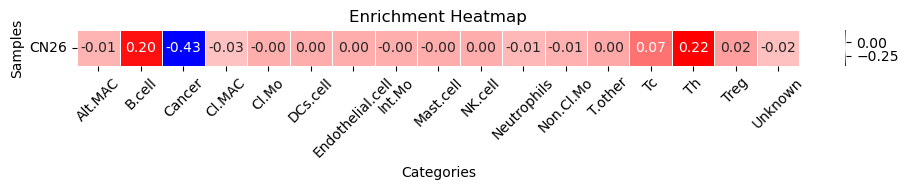

In [145]:

avg = df_full.iloc[:, 3:-7].mean(axis=0)
avg_26 = df_full[df_full['agglomerateto_40'] == 26].iloc[:, 3:-7].mean(axis=0)
avg

enrichment_scores = avg_26 - avg  # 10 samples, 5 categories
category_names = enrichment_scores.index

enrichment_scores = np.array(enrichment_scores).reshape(1, 17)
# Example sample and category names
sample_names = [f"CN26" for i in range(0, 1)]

# Create a DataFrame from the enrichment scores data
df = pd.DataFrame(data=enrichment_scores, index=sample_names, columns=category_names)

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 2))
sns.heatmap(df, cmap='bwr', annot=True, fmt=".2f", linewidths=.5)
plt.title('Enrichment Heatmap')
plt.xlabel('Categories')
plt.ylabel('Samples')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
